In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Sequential, Model
from tensorflow.keras import losses,optimizers
from tensorflow.keras import metrics

import os
import random
import numpy as np
from matplotlib import pyplot as plt

## Read Data

In [9]:
def load_images(files):
    path = files[0]
    label = tf.cast(tf.strings.to_number(files[1]), tf.int32)
    image = tf.io.read_file(path)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    mean = np.array([[[0.485, 0.456 , 0.406]]])
    std = np.array([[[0.229, 0.224, 0.225]]])
    
    if len(image.shape) != 3:
        image = tf.expand_dims(image, 2)
        image = (image - mean) / std
        image = tf.repeat(image, 3, 2)
        image = tf.image.resize(image, (64, 64))
    else:
        image = (image - mean) / std
        image = tf.image.resize(image, (64, 64))
        
    return image, label

def load_data(path, data_name):
    file_path = path + data_name + '.txt'
    with open(file_path, 'r') as f:
        content = f.read().split('\n')          
        data = [i.split(' ') for i in content][:-1]
        data = [[os.path.join(path, i), j] for i, j in data]
    
    random.shuffle(data)
    files = tf.data.Dataset.from_tensor_slices(data)
    ds = files.map(load_images)
    return ds

## Model Sturcture

In [6]:
def LeNet5(X):
    # Here we defind the CNN architecture (LeNet-5)
    
    ### input size -> (batch_size, 64, 64, 3)
    input_layer = X

    # Convolutional Layer #1
    # Has a default stride of 1
    # Output: 62 * 62 * 6
    conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=6, # Number of filters.
      kernel_size=5, # Size of each filter is 5x5.
#       padding="valid", # No padding is applied to the input.
      activation=tf.nn.relu)

    # Pooling Layer #1
    # Sampling half the output of previous layer
    # Output: 31 * 31 * 6
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Convolutional Layer #2
    # Output: 29 * 29 * 16
    conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=16, # Number of filters
      kernel_size=5, # Size of each filter is 5x5
#       padding="valid", # No padding
      activation=tf.nn.relu)

    # Pooling Layer #2
    # Output: 13 * 13 * 16
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Reshaping output into a single dimention array for input to fully connected layer
    pool2_flat = tf.reshape(pool2, [-1, 13 * 13 * 16])

    # Fully connected layer #1: Has 120 neurons
    dense1 = tf.layers.dense(inputs=pool2_flat, units=120, activation=tf.nn.relu)

    # Fully connected layer #2: Has 84 neurons
    dense2 = tf.layers.dense(inputs=dense1, units=84, activation=tf.nn.relu)

    # Output layer, 50 neurons for each digit
    logits = tf.layers.dense(inputs=dense2, units=50)

    return logits

Train on 248 steps, validate on 1 steps
Epoch 1/500
248/248 [==============================] - ETA: 0s - batch: 123.5000 - size: 1.0000 - loss: 3.8566 - sparse_categorical_accuracy: 0.0360

/home/ncku02/miniconda3/envs/pytorch_tf2/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


248/248 [==============================] - 222s 893ms/step - batch: 123.5000 - size: 1.0000 - loss: 3.8566 - sparse_categorical_accuracy: 0.0360 - val_loss: 3.6829 - val_sparse_categorical_accuracy: 0.0733
Epoch 2/500
248/248 [==============================] - 139s 559ms/step - batch: 123.5000 - size: 1.0000 - loss: 3.5277 - sparse_categorical_accuracy: 0.0915 - val_loss: 3.3974 - val_sparse_categorical_accuracy: 0.1311
Epoch 3/500
248/248 [==============================] - 160s 647ms/step - batch: 123.5000 - size: 1.0000 - loss: 3.3298 - sparse_categorical_accuracy: 0.1229 - val_loss: 3.2755 - val_sparse_categorical_accuracy: 0.1267
Epoch 4/500
248/248 [==============================] - 175s 704ms/step - batch: 123.5000 - size: 1.0000 - loss: 3.2234 - sparse_categorical_accuracy: 0.1436 - val_loss: 3.1969 - val_sparse_categorical_accuracy: 0.1333
Epoch 5/500
248/248 [==============================] - 176s 708ms/step - batch: 123.5000 - size: 1.0000 - loss: 3.1442 - sparse_categorical_

248/248 [==============================] - 179s 721ms/step - batch: 123.5000 - size: 1.0000 - loss: 1.7776 - sparse_categorical_accuracy: 0.4766 - val_loss: 3.4061 - val_sparse_categorical_accuracy: 0.1889
Epoch 76/500
248/248 [==============================] - 179s 720ms/step - batch: 123.5000 - size: 1.0000 - loss: 1.7680 - sparse_categorical_accuracy: 0.4788 - val_loss: 3.4210 - val_sparse_categorical_accuracy: 0.1911
Epoch 77/500
248/248 [==============================] - 178s 718ms/step - batch: 123.5000 - size: 1.0000 - loss: 1.7634 - sparse_categorical_accuracy: 0.4795 - val_loss: 3.4373 - val_sparse_categorical_accuracy: 0.1933
Epoch 78/500
248/248 [==============================] - 178s 716ms/step - batch: 123.5000 - size: 1.0000 - loss: 1.7652 - sparse_categorical_accuracy: 0.4785 - val_loss: 3.4578 - val_sparse_categorical_accuracy: 0.1978
Epoch 79/500
248/248 [==============================] - 180s 727ms/step - batch: 123.5000 - size: 1.0000 - loss: 1.7700 - sparse_categori

248/248 [==============================] - 179s 722ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.7168 - sparse_categorical_accuracy: 0.8124 - val_loss: 6.0777 - val_sparse_categorical_accuracy: 0.1644
Epoch 150/500
248/248 [==============================] - 178s 717ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.7010 - sparse_categorical_accuracy: 0.8183 - val_loss: 6.1388 - val_sparse_categorical_accuracy: 0.1600
Epoch 151/500
248/248 [==============================] - 177s 715ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.6859 - sparse_categorical_accuracy: 0.8232 - val_loss: 6.1996 - val_sparse_categorical_accuracy: 0.1622
Epoch 152/500
248/248 [==============================] - 179s 722ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.6714 - sparse_categorical_accuracy: 0.8292 - val_loss: 6.2607 - val_sparse_categorical_accuracy: 0.1600
Epoch 153/500
248/248 [==============================] - 178s 718ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.6578 - sparse_cate

248/248 [==============================] - 181s 729ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.6885 - sparse_categorical_accuracy: 0.7746 - val_loss: 8.3269 - val_sparse_categorical_accuracy: 0.1311
Epoch 224/500
248/248 [==============================] - 180s 728ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.6500 - sparse_categorical_accuracy: 0.7880 - val_loss: 8.3281 - val_sparse_categorical_accuracy: 0.1289
Epoch 225/500
248/248 [==============================] - 179s 723ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.6223 - sparse_categorical_accuracy: 0.7989 - val_loss: 8.2484 - val_sparse_categorical_accuracy: 0.1133
Epoch 226/500
248/248 [==============================] - 180s 725ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.5996 - sparse_categorical_accuracy: 0.8074 - val_loss: 8.3431 - val_sparse_categorical_accuracy: 0.1111
Epoch 227/500
248/248 [==============================] - 179s 723ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.5805 - sparse_cate

248/248 [==============================] - 179s 722ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.3127 - sparse_categorical_accuracy: 0.9097 - val_loss: 10.6501 - val_sparse_categorical_accuracy: 0.1178
Epoch 298/500
248/248 [==============================] - 180s 725ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.3107 - sparse_categorical_accuracy: 0.9081 - val_loss: 10.7502 - val_sparse_categorical_accuracy: 0.1111
Epoch 299/500
248/248 [==============================] - 179s 723ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.3165 - sparse_categorical_accuracy: 0.9054 - val_loss: 10.8170 - val_sparse_categorical_accuracy: 0.1044
Epoch 300/500
248/248 [==============================] - 178s 719ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.3183 - sparse_categorical_accuracy: 0.9053 - val_loss: 10.9844 - val_sparse_categorical_accuracy: 0.1044
Epoch 301/500
248/248 [==============================] - 181s 728ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.3185 - sparse_

248/248 [==============================] - 182s 735ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.1682 - sparse_categorical_accuracy: 0.9561 - val_loss: 12.2996 - val_sparse_categorical_accuracy: 0.1222
Epoch 372/500
248/248 [==============================] - 183s 737ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.1670 - sparse_categorical_accuracy: 0.9565 - val_loss: 12.4020 - val_sparse_categorical_accuracy: 0.1311
Epoch 373/500
248/248 [==============================] - 182s 734ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.1682 - sparse_categorical_accuracy: 0.9564 - val_loss: 12.4801 - val_sparse_categorical_accuracy: 0.1111
Epoch 374/500
248/248 [==============================] - 179s 722ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.1634 - sparse_categorical_accuracy: 0.9580 - val_loss: 12.6095 - val_sparse_categorical_accuracy: 0.1156
Epoch 375/500
248/248 [==============================] - 182s 735ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.1603 - sparse_

248/248 [==============================] - 139s 560ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.0454 - sparse_categorical_accuracy: 0.9926 - val_loss: 14.4332 - val_sparse_categorical_accuracy: 0.1178
Epoch 446/500
248/248 [==============================] - 138s 556ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.0450 - sparse_categorical_accuracy: 0.9929 - val_loss: 14.3591 - val_sparse_categorical_accuracy: 0.1178
Epoch 447/500
248/248 [==============================] - 138s 557ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.0460 - sparse_categorical_accuracy: 0.9922 - val_loss: 14.4470 - val_sparse_categorical_accuracy: 0.1356
Epoch 448/500
248/248 [==============================] - 138s 556ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.0477 - sparse_categorical_accuracy: 0.9914 - val_loss: 14.4006 - val_sparse_categorical_accuracy: 0.1289
Epoch 449/500
248/248 [==============================] - 138s 556ms/step - batch: 123.5000 - size: 1.0000 - loss: 0.0491 - sparse_

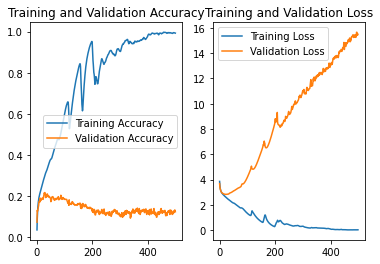

In [11]:
path = ""
train_data = load_data(path, 'train').batch(256)
val_data = load_data(path, 'val').batch(450)
test_data = load_data(path, 'test').batch(450)

class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.c2 = Conv2D(filters=16, kernel_size=(5, 5),
                         activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(50, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y


model = LeNet5()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "Lenet5.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(train_data, epochs=300, validation_data=val_data, callbacks=[cp_callback])
model.summary()

# print(model.trainable_variables)
# file = open('E:/path/tf2.0_data/tf_board/save_lenet5/weights.txt', 'w')
# for v in model.trainable_variables:
#     file.write(str(v.name) + '\n')
#     file.write(str(v.shape) + '\n')
#     file.write(str(v.numpy()) + '\n')
# file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [30]:
print("Validation accuracy: ", model.evaluate(val_data)[1])
print("Test accuracy: ", model.evaluate(test_data)[1])

Validation accuracy:  0.12444445
Test accuracy:  0.15333334


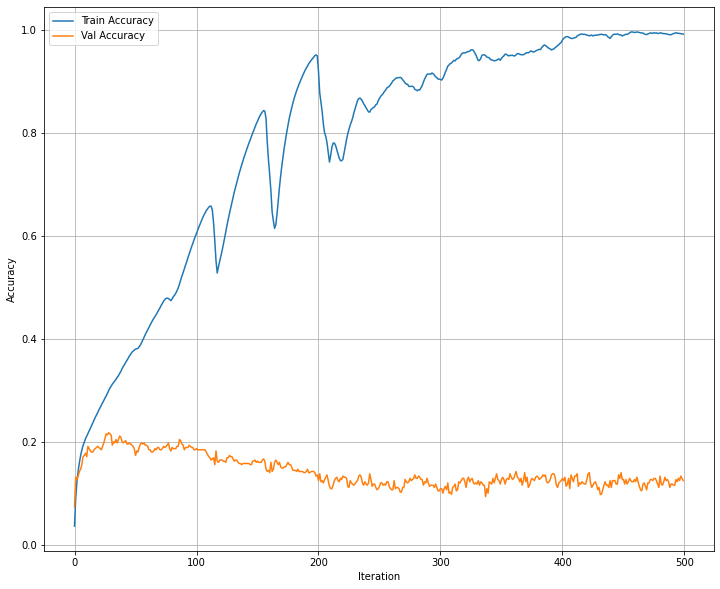

In [17]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
ax.plot(acc,label="Train Accuracy")
ax.plot(val_acc,label="Val Accuracy")
ax.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid()

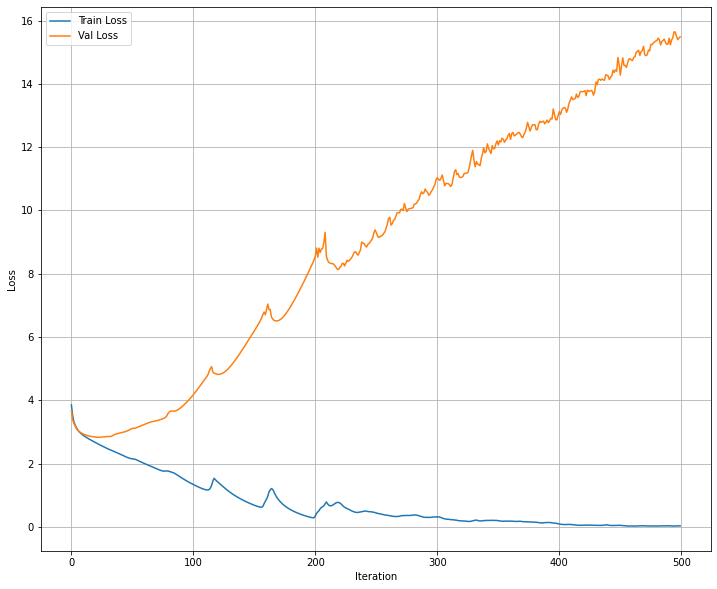

In [19]:
fig,ax = plt.subplots(1,1,figsize=(12,10))
ax.plot(loss,label="Train Loss")
ax.plot(val_loss,label="Val Loss")
ax.legend()
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.grid()